# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 583


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric"  # Specify units=metric for Celsius
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | papatowai
Processing Record 2 of Set 1 | dellys
Processing Record 3 of Set 1 | grytviken
Processing Record 4 of Set 1 | gadzhiyevo
Processing Record 5 of Set 1 | tazovsky
Processing Record 6 of Set 1 | adamstown
Processing Record 7 of Set 1 | horta
Processing Record 8 of Set 1 | bethel
Processing Record 9 of Set 1 | rio gallegos
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | osmanabad
Processing Record 12 of Set 1 | tiksi
Processing Record 13 of Set 1 | nikolayevsk-on-amure
Processing Record 14 of Set 1 | morant bay
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | edinburgh of the seven seas
Processing Record 17 of Set 1 | talnakh
Processing Record 18 of Set 1 | isafjordur
Processing Record 19 of Set 1 | khuzdar
Processing Record 20 of Set 1 | blackmans bay
Processing Record 21 of Set 1 | yellowknife
Processing Record 22 of Set 1 | kapshagay
Processi

Processing Record 39 of Set 4 | nyurba
Processing Record 40 of Set 4 | vila do maio
Processing Record 41 of Set 4 | molde
Processing Record 42 of Set 4 | polyarnyy
Processing Record 43 of Set 4 | malakal
Processing Record 44 of Set 4 | vadso
Processing Record 45 of Set 4 | imbituba
Processing Record 46 of Set 4 | posse
Processing Record 47 of Set 4 | sao paulo de olivenca
Processing Record 48 of Set 4 | fada
Processing Record 49 of Set 4 | monte alegre
Processing Record 0 of Set 5 | punta arenas
Processing Record 1 of Set 5 | tongchuan
Processing Record 2 of Set 5 | elko
Processing Record 3 of Set 5 | martan-chu
Processing Record 4 of Set 5 | basoko
Processing Record 5 of Set 5 | deqen
Processing Record 6 of Set 5 | paros
Processing Record 7 of Set 5 | piti village
Processing Record 8 of Set 5 | prien
Processing Record 9 of Set 5 | airuk
Processing Record 10 of Set 5 | carutapera
Processing Record 11 of Set 5 | lorengau
Processing Record 12 of Set 5 | nkhata bay
Processing Record 13 of

Processing Record 30 of Set 8 | mitsamiouli
Processing Record 31 of Set 8 | hirara
Processing Record 32 of Set 8 | hamilton
Processing Record 33 of Set 8 | la passe
Processing Record 34 of Set 8 | robertsport
Processing Record 35 of Set 8 | zaozersk
Processing Record 36 of Set 8 | kholmsk
Processing Record 37 of Set 8 | machico
Processing Record 38 of Set 8 | canutama
Processing Record 39 of Set 8 | saint-joseph
Processing Record 40 of Set 8 | el bayadh
Processing Record 41 of Set 8 | quirihue
Processing Record 42 of Set 8 | baley
Processing Record 43 of Set 8 | kindu
Processing Record 44 of Set 8 | toga village
City not found. Skipping...
Processing Record 45 of Set 8 | satupa'itea
City not found. Skipping...
Processing Record 46 of Set 8 | marsabit
Processing Record 47 of Set 8 | kota tinggi
Processing Record 48 of Set 8 | st. john's
Processing Record 49 of Set 8 | malvan
Processing Record 0 of Set 9 | taoudenni
Processing Record 1 of Set 9 | flin flon
Processing Record 2 of Set 9 | 

Processing Record 20 of Set 12 | yorosso
Processing Record 21 of Set 12 | boras
Processing Record 22 of Set 12 | acarau
Processing Record 23 of Set 12 | wuwei
Processing Record 24 of Set 12 | tabuk
Processing Record 25 of Set 12 | mareeba
Processing Record 26 of Set 12 | opuwo
Processing Record 27 of Set 12 | zhangjiakou
Processing Record 28 of Set 12 | mawu
Processing Record 29 of Set 12 | doctor alberto oviedo mota
Processing Record 30 of Set 12 | baixa grande
Processing Record 31 of Set 12 | grants
Processing Record 32 of Set 12 | mhamid
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          558
Lat           558
Lng           558
Max Temp      558
Humidity      558
Cloudiness    558
Wind Speed    558
Country       558
Date          558
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,papatowai,-46.5619,169.4708,6.65,76,97,3.03,NZ,1697479308
1,dellys,36.9172,3.9131,23.16,61,47,2.75,DZ,1697479308
2,grytviken,-54.2811,-36.5092,0.63,77,29,5.14,GS,1697479308
3,gadzhiyevo,69.2551,33.3362,3.25,86,100,13.48,RU,1697479309
4,tazovsky,67.4667,78.7000,-0.41,97,100,2.50,RU,1697479309


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,papatowai,-46.5619,169.4708,6.65,76,97,3.03,NZ,1697479308
1,dellys,36.9172,3.9131,23.16,61,47,2.75,DZ,1697479308
2,grytviken,-54.2811,-36.5092,0.63,77,29,5.14,GS,1697479308
3,gadzhiyevo,69.2551,33.3362,3.25,86,100,13.48,RU,1697479309
4,tazovsky,67.4667,78.7000,-0.41,97,100,2.50,RU,1697479309


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

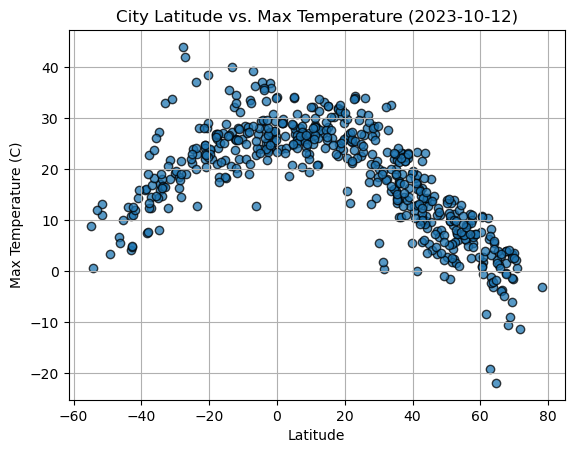

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
# Set labels and title
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs. Max Temperature (2023-10-12)")

# Set grid lines
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

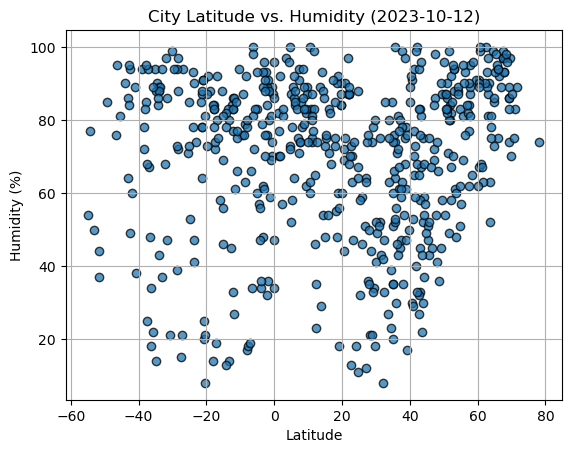

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
# Set labels and title
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2023-10-12)")

# Set grid lines
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

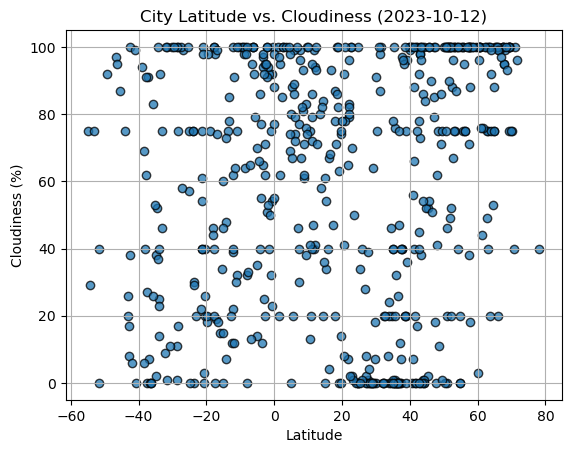

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
# Set labels and title
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2023-10-12)")

# Set grid lines
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

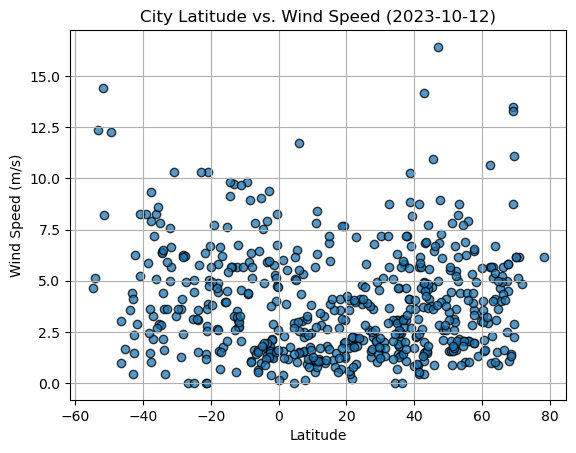

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", alpha=0.75)


# Incorporate the other graph properties
# Set labels and title
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2023-10-12)")

# Set grid lines
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, xlabel, ylabel, title, text_coordinates):
    # Perform linear regression
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line
    regress_values = x_values * slope + intercept
    
    # Create a line equation string
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
    # Create the scatter plot
    plt.scatter(x_values, y_values)
    
    # Plot the regression line
    plt.plot(x_values, regress_values, "r-")
    
    # Annotate the line equation on the plot
    plt.annotate(line_eq, text_coordinates, fontsize=12, color="red")
    
    # Set labels and title
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    
    # Print the r-squared value
    print(f"R-squared: {r_value**2}")
    
    # Show the plot
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,dellys,36.9172,3.9131,23.16,61,47,2.75,DZ,1697479308
3,gadzhiyevo,69.2551,33.3362,3.25,86,100,13.48,RU,1697479309
4,tazovsky,67.4667,78.7000,-0.41,97,100,2.50,RU,1697479309
6,horta,38.5333,-28.6333,22.80,75,20,4.12,PT,1697479309
7,bethel,41.3712,-73.4140,17.11,65,88,0.45,US,1697479309


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,papatowai,-46.5619,169.4708,6.65,76,97,3.03,NZ,1697479308
2,grytviken,-54.2811,-36.5092,0.63,77,29,5.14,GS,1697479308
5,adamstown,-25.0660,-130.1015,21.23,85,57,4.44,PN,1697479309
8,rio gallegos,-51.6226,-69.2181,11.03,37,0,8.23,AR,1697479310
9,ushuaia,-54.8000,-68.3000,8.81,54,75,4.63,AR,1697479295


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: = -0.8647069577789006


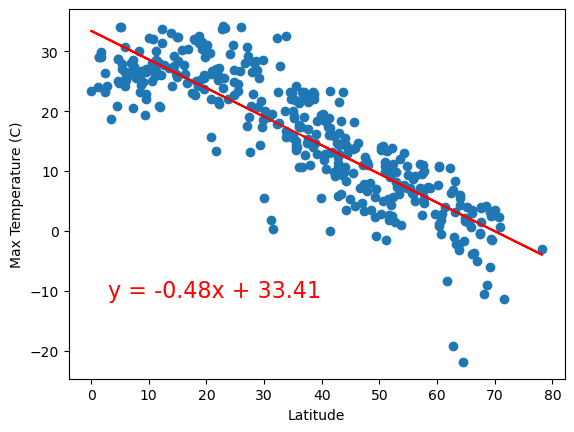

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Perform linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Calculate the regression line
regress_values = x_values * slope + intercept

# Create a line equation string
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Create the scatter plot
plt.scatter(x_values, y_values)

# Plot the regression line
plt.plot(x_values, regress_values, "r-")

# Set labels and title
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Annotate the line equation on the plot
plt.annotate(line_eq, (3, -11), fontsize=16, color="red")

# Display the r-value just below the code
print(f"The r-value is: = {r_value}")

# Show the plot
plt.show()

The r-value is: = 0.7044845750188119


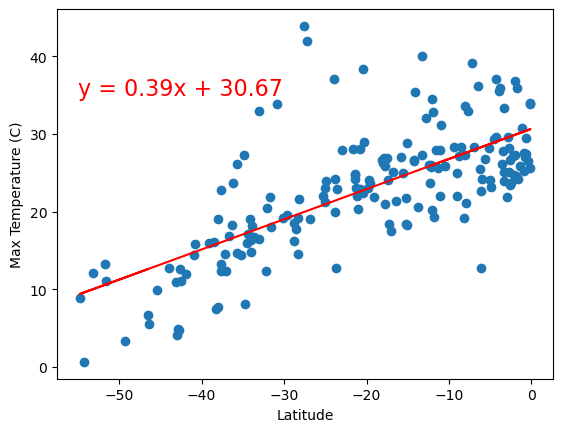

In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Perform linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Calculate the regression line
regress_values = x_values * slope + intercept

# Create a line equation string
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Create the scatter plot
plt.scatter(x_values, y_values)

# Plot the regression line
plt.plot(x_values, regress_values, "r-")

# Set labels and title
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Annotate the line equation on the plot
plt.annotate(line_eq, (-55, 35), fontsize=16, color="red")

# Display the r-value just below the code
print(f"The r-value is: = {r_value}")

# Show the plot
plt.show()

**Discussion about the linear relationship:** As you would expect, the further north you move in the Northern Hemisphere, the colder the temperature gets. Conversely, the further south you move in the Northern Hemisphere, the warmer the temperature gets. The exact opposite is true for the Sothern Hemisphere (in reference to North and South). This high r-value shows this, but it is not a perfect correlation. The reason for this is due to the large number of factors that play a role in a location’s temperature, including but not limited to: prevailing winds, ocean currents, terrain, proximity to the ocean, etc. In summary, there is a very strong correlation between latitude and temperature.  

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.1399441857480945


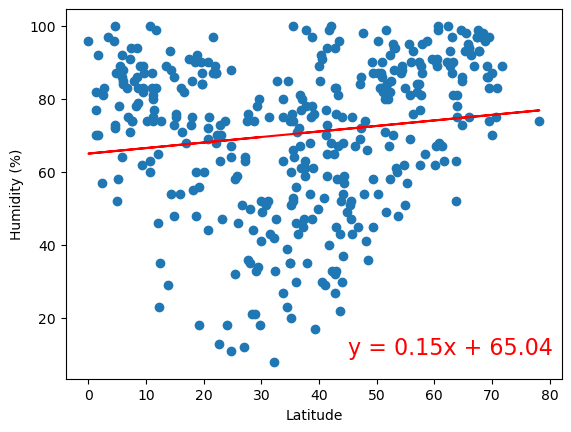

In [17]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere for Humidity vs. Latitude
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Perform linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Calculate the regression line
regress_values = x_values * slope + intercept

# Create a line equation string
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Create the scatter plot
plt.scatter(x_values, y_values)

# Plot the regression line
plt.plot(x_values, regress_values, "r-")

# Set labels and title
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Annotate the line equation on the plot
plt.annotate(line_eq, (45, 10), fontsize=16, color="red")

# Display the r-value just below the code
print(f"The r-value is: {r_value}")

# Show the plot
plt.show()

The r-value is: -0.002271549869387423


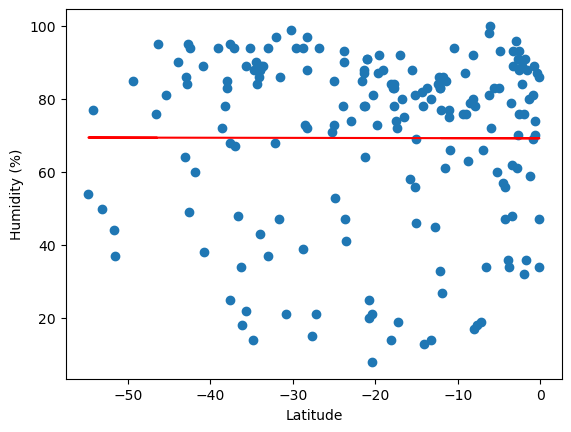

In [18]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere for Humidity vs. Latitude
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Perform linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Calculate the regression line
regress_values = x_values * slope + intercept

# Create a line equation string
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Create the scatter plot
plt.scatter(x_values, y_values)

# Plot the regression line
plt.plot(x_values, regress_values, "r-")

# Set labels and title
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Annotate the line equation on the plot
plt.annotate(line_eq, (-55, 0), fontsize=16, color="red")

# Display the r-value just below the code
print(f"The r-value is: {r_value}")

# Show the plot
plt.show()

**Discussion about the linear relationship:** The correlation for the Northern Hemisphere (0.17) and the Southern Hemisphere (-0.07) are both very weak, indicating there is not a strong linear relationship between Latitude and Humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.16269564165369765


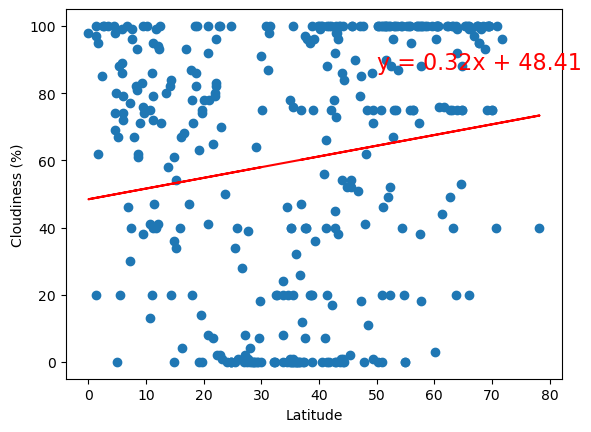

In [19]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere for Cloudiness vs. Latitude
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Perform linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Calculate the regression line
regress_values = x_values * slope + intercept

# Create a line equation string
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Create the scatter plot
plt.scatter(x_values, y_values)

# Plot the regression line
plt.plot(x_values, regress_values, "r-")

# Set labels and title
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Annotate the line equation on the plot
plt.annotate(line_eq, (50, 87), fontsize=16, color="red")

# Display the r-value just below the code
print(f"The r-value is: {r_value}")

# Show the plot
plt.show()

The r-value is: 0.20203417292181902


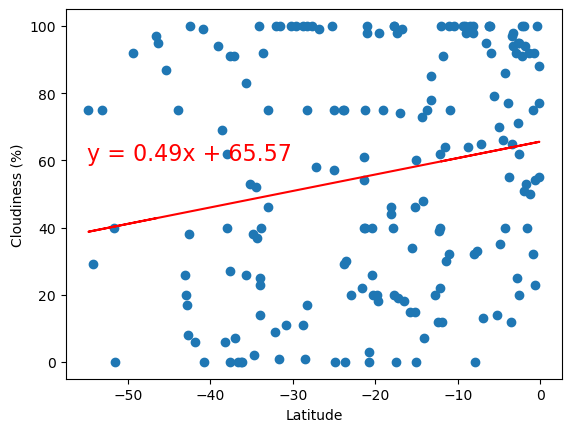

In [20]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere for Cloudiness vs. Latitude
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Perform linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Calculate the regression line
regress_values = x_values * slope + intercept

# Create a line equation string
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Create the scatter plot
plt.scatter(x_values, y_values)

# Plot the regression line
plt.plot(x_values, regress_values, "r-")

# Set labels and title
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Annotate the line equation on the plot
plt.annotate(line_eq, (-55, 60), fontsize=16, color="red")

# Display the r-value just below the code
print(f"The r-value is: {r_value}")

# Show the plot
plt.show()


**Discussion about the linear relationship:** The correlation for the Northern Hemisphere (0.19) and the Southern Hemisphere (-0.09) are both very weak, indicating there is not a strong linear relationship between Latitude and Cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.2574830433763557


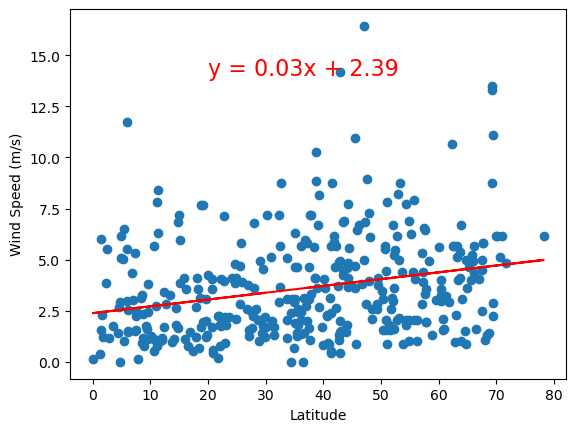

In [21]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere for Wind Speed vs. Latitude
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Perform linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Calculate the regression line
regress_values = x_values * slope + intercept

# Create a line equation string
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Create the scatter plot
plt.scatter(x_values, y_values)

# Plot the regression line
plt.plot(x_values, regress_values, "r-")

# Set labels and title
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Annotate the line equation on the plot
plt.annotate(line_eq, (20, 14), fontsize=16, color="red")

# Display the r-value just below the code
print(f"The r-value is: {r_value}")

# Show the plot
plt.show()


The r-value is: -0.19833105908401708


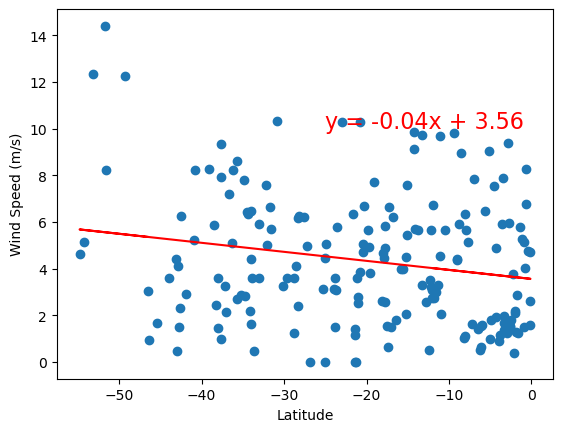

In [22]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere for Wind Speed vs. Latitude
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Perform linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Calculate the regression line
regress_values = x_values * slope + intercept

# Create a line equation string
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Create the scatter plot
plt.scatter(x_values, y_values)

# Plot the regression line
plt.plot(x_values, regress_values, "r-")

# Set labels and title
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Annotate the line equation on the plot
plt.annotate(line_eq, (-25, 10), fontsize=16, color="red")

# Display the r-value just below the code
print(f"The r-value is: {r_value}")

# Show the plot
plt.show()


**Discussion about the linear relationship:** While the correlation for the Northern Hemisphere (0.28) and the Southern Hemisphere (-0.31) are both stronger than that of Cloudiness and Humidity, the are still relatively very weak, indicating there is not a strong linear relationship between Latitude and Wind Speed.